In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import sqlalchemy
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.orm import Session

import sqlite3
import seaborn as sns

In [12]:
alldata = pd.read_csv('./Resources/water_potability.csv')
alldata.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
alldata.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
alldata.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [16]:
alldata.shape

(3276, 10)

In [17]:
alldata.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
alldata['ph'] = alldata['ph'].fillna(0)
alldata['Sulfate'] = alldata['Sulfate'].fillna(0)
alldata['Trihalomethanes'] = alldata['Trihalomethanes'].fillna(0)

In [19]:
alldata.shape

(3276, 10)

In [20]:
alldata.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

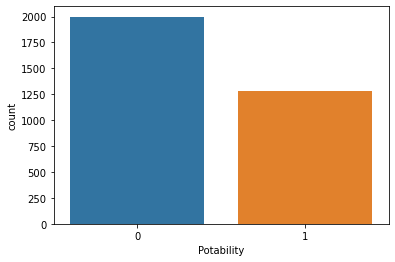

In [21]:
sns.countplot(alldata.Potability,label="count")
plt.show()

In [22]:
alldata.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [23]:
alldata.describe

<bound method NDFrame.describe of             ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.9631

In [24]:
conn = sqlite3.connect('./Resources/alldata.sqlite')

alldata.to_sql(name = 'alldata', con = conn, if_exists='replace', index=False)
cur = conn.cursor()


In [25]:
cur.execute("select * from alldata limit 5;")
results = cur.fetchall()
print(results)

[(0.0, 204.89045547133634, 20791.318980747023, 7.300211873184757, 368.5164413498034, 564.3086541722439, 10.3797830780847, 86.9909704615088, 2.9631353806316407, 0), (3.7160800753869903, 129.42292051494422, 18630.05785797035, 6.635245883862, 0.0, 592.8853591348523, 15.18001311635726, 56.32907628451764, 4.500656274942409, 0), (8.099124189298397, 224.23625939355773, 19909.541732292397, 9.275883602694089, 0.0, 418.6062130644815, 16.868636929550973, 66.42009251176368, 3.0559337496641685, 0), (8.316765884214679, 214.3733940856225, 22018.417440775294, 8.05933237743854, 356.88613564305666, 363.2665161642437, 18.436524495493305, 100.34167436508007, 4.6287705368370835, 0), (9.092223456290963, 181.10150923612525, 17978.98633892625, 6.5465999742079415, 310.13573752420444, 398.4108133818448, 11.558279443446395, 31.997992727424737, 4.075075425430033, 0)]


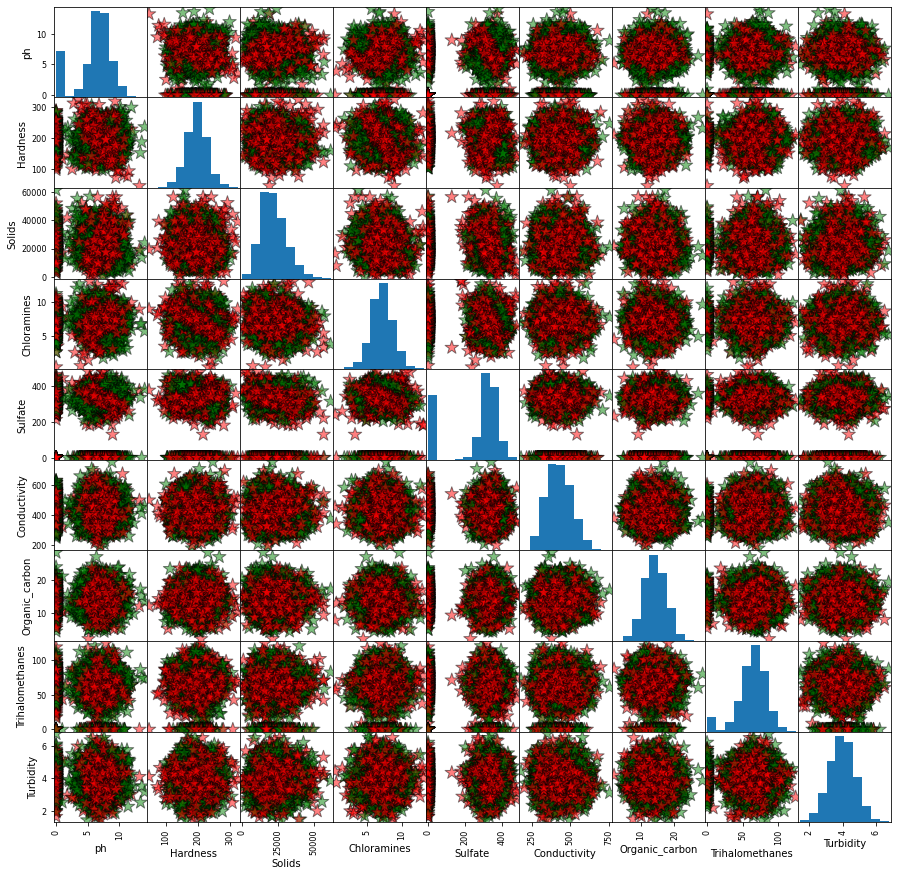

In [26]:
color_list = ['red' if i==1 else 'green' for i in alldata.loc[:,'Potability']]
pd.plotting.scatter_matrix(alldata.loc[:, alldata.columns != 'Potability'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

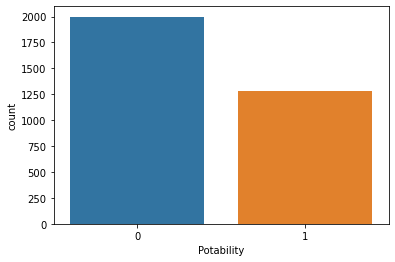

In [31]:
sns.countplot(alldata.Potability,label="count")
plt.show()

In [36]:
alldata.loc[:,"Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [29]:
alldata.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.032591,-0.051277,-0.010452,-0.010128,0.030879,0.034793,0.013248,-0.009120,0.020390
Hardness,0.032591,1.000000,-0.046899,-0.030054,-0.031065,-0.023915,0.003610,-0.005691,-0.014449,-0.013837
Solids,-0.051277,-0.046899,1.000000,-0.070148,-0.026671,0.013831,0.010242,-0.023065,0.019546,0.033743
Chloramines,-0.010452,-0.030054,-0.070148,1.000000,0.002513,-0.020486,-0.012653,0.014974,0.002363,0.023779
Sulfate,-0.010128,-0.031065,-0.026671,0.002513,1.000000,-0.017943,0.029329,-0.011642,0.000244,0.011542
Conductivity,0.030879,-0.023915,0.013831,-0.020486,-0.017943,1.000000,0.020966,0.016318,0.005798,-0.008128
Organic_carbon,0.034793,0.003610,0.010242,-0.012653,0.029329,0.020966,1.000000,-0.013381,-0.027308,-0.030001
Trihalomethanes,0.013248,-0.005691,-0.023065,0.014974,-0.011642,0.016318,-0.013381,1.000000,-0.019066,0.021094
Turbidity,-0.009120,-0.014449,0.019546,0.002363,0.000244,0.005798,-0.027308,-0.019066,1.000000,0.001581
Potability,0.020390,-0.013837,0.033743,0.023779,0.011542,-0.008128,-0.030001,0.021094,0.001581,1.000000


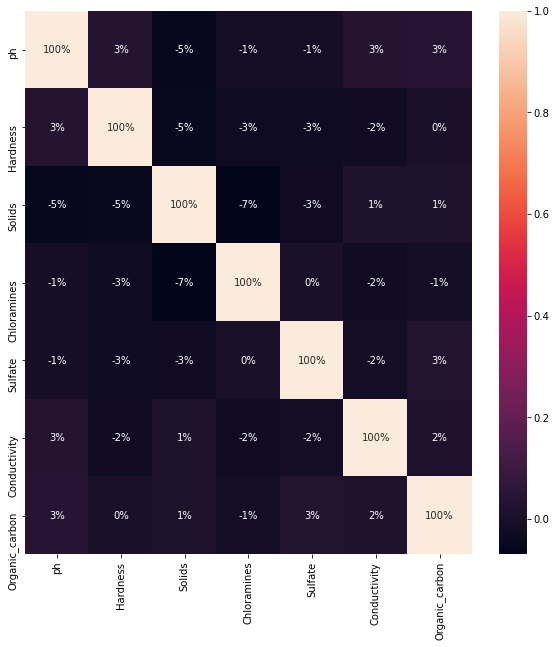

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(alldata.iloc[:,0:7].corr(),annot=True,fmt=".0%")
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y =alldata.loc[:,alldata.columns != 'Potability'], alldata.loc[:,'Potability']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 1 1 1]


In [34]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = alldata.loc[:,alldata.columns != 'Potability'], alldata.loc[:,'Potability']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.555442522889115


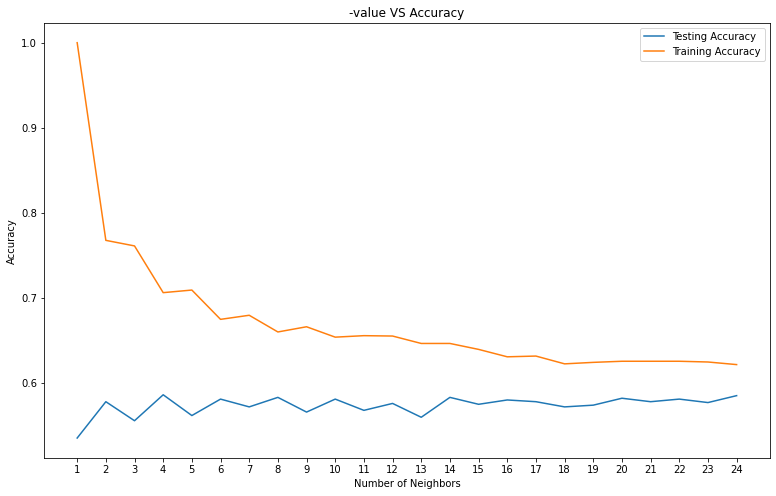

Best accuracy is 0.5859613428280773 with K = 4


In [37]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

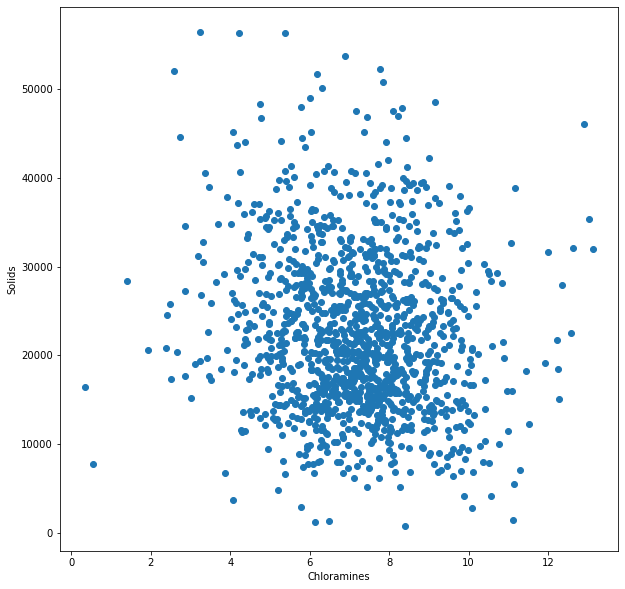

In [39]:
data1 = alldata[alldata['Potability'] ==1]
x = np.array(data1.loc[:,'Chloramines']).reshape(-1,1)
y = np.array(data1.loc[:,'Solids']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Chloramines')
plt.ylabel('Solids')
plt.show()

R^2 score:  0.015322776746518385


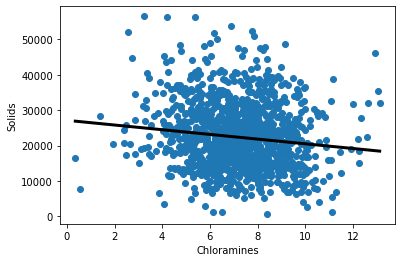

In [40]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('Chloramines')
plt.ylabel('Solids')
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [-0.09752995  0.00890008  0.02764781 -0.14792339 -0.01316803]
CV scores average:  -0.044414696019999055


In [42]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.01428104018514087


In [43]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['Solids',"ph","Sulfate","Trihalomethanes"]])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9999998959241826
Lasso coefficients:  [ 0.99967893  0.         -0.         -0.        ]


In [45]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = alldata.loc[:,alldata.columns != 'Potability'], alldata.loc[:,'Potability']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[517  68]
 [279 119]]
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.88      0.75       585
           1       0.64      0.30      0.41       398

    accuracy                           0.65       983
   macro avg       0.64      0.59      0.58       983
weighted avg       0.64      0.65      0.61       983



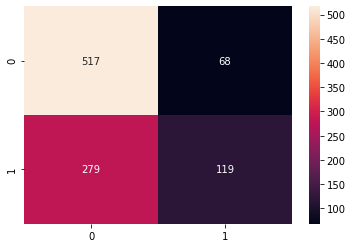

In [46]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

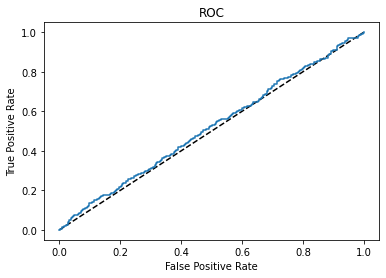

In [48]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

alldata['class_binary'] = [1 if i ==1 else 0 for i in alldata.loc[:,'Potability']]
x,y = alldata.loc[:,(alldata.columns != 'Potability') & (alldata.columns != 'class_binary')], alldata.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [49]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 46}
Best score: 0.6001221001221001


In [50]:
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.6088092712361267


In [51]:
data = pd.get_dummies(alldata)
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,class_binary
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0
8,0.000000,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0,0


In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.6128048780487805
Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


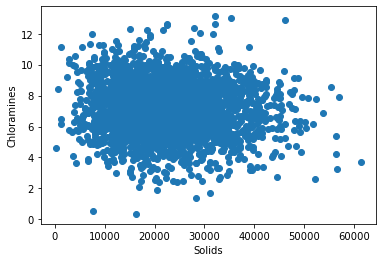

In [53]:

plt.scatter(data['Solids'],data['Chloramines'])
plt.xlabel('Solids')
plt.ylabel('Chloramines')
plt.show()

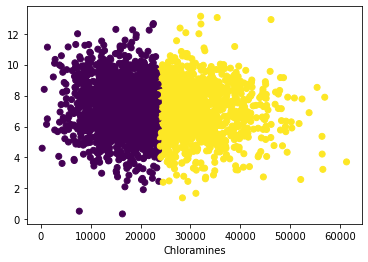

In [54]:
data2 = data.loc[:,['Solids','Chloramines']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['Solids'],data['Chloramines'],c = labels)
plt.xlabel('Solids')
plt.xlabel('Chloramines')
plt.show()

In [55]:
df = pd.DataFrame({'labels':labels,"Potability":data['Potability']})
ct = pd.crosstab(df['labels'],df['Potability'])
print(ct)

Potability     0    1
labels               
0           1257  777
1            741  501


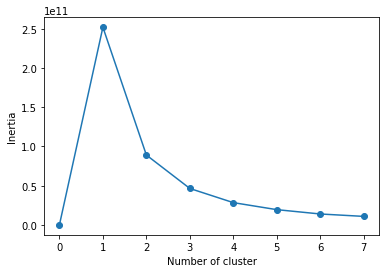

In [56]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [57]:
data3 = data.drop('Potability',axis = 1)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"Potability":data['Potability']})
ct = pd.crosstab(df['labels'],df['Potability'])
print(ct)

Potability     0     1
labels                
0              0  1278
1           1998     0


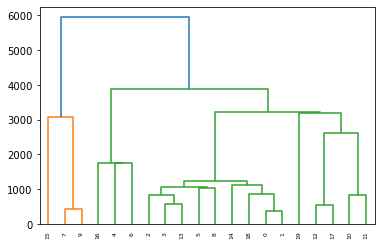

In [59]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

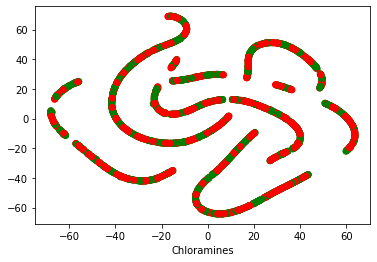

In [60]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('Solids')
plt.xlabel('Chloramines')
plt.show()

In [61]:
# PCA
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[-1.71001386e-05 -1.75861535e-04  9.99999875e-01 -1.26645011e-05
  -4.46533981e-04  1.27498075e-04  3.86410471e-06 -5.61691274e-05
   1.73956225e-06  1.87734100e-06]
 [ 2.35123439e-04  7.58240869e-03 -4.46802418e-04 -9.10240418e-06
  -9.99873010e-01  1.38703595e-02 -6.64181358e-04  1.83991604e-03
  -3.99332506e-06 -4.16409429e-05]
 [ 1.12966176e-03 -1.17392640e-02 -1.23110685e-04 -3.78789062e-04
   1.37889517e-02  9.99824096e-01  8.83071750e-04  4.64883625e-03
   5.39703783e-05 -4.95031332e-05]
 [-2.75715437e-03 -9.99867847e-01 -1.77401467e-04  1.64475611e-03
  -7.73040571e-03 -1.16642403e-02 -5.90162168e-04  7.59309450e-03
   3.16090310e-04  1.81411322e-04]
 [-1.63646143e-03 -7.63125111e-03 -5.89618623e-05 -9.93360251e-04
  -1.83604779e-03  4.58473024e-03  2.07787786e-03 -9.99954327e-01
   6.90628690e-04 -5.04563385e-04]
 [ 1.36191323e-01 -9.44881234e-04 -1.79458879e-06 -7.77278413e-03
  -6.43967155e-04 -1.04236748e-03  9.90615230e-01  1.84409034e-03
  -7.09840

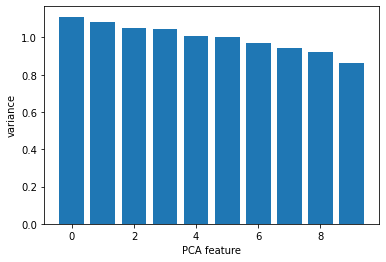

In [62]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

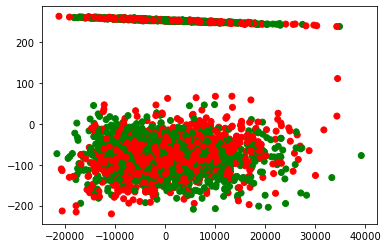

In [63]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()